<a href="https://colab.research.google.com/github/aminbuet/Deep_Learning_Projects/blob/master/pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as ap


In [0]:
# Instantiate a model with imagenet
model = ResNet50(weights='imagenet')

# if load Inception_V3 model, the code is as follows
# from tensorflow.keras.applications import inception_v3
# inception_model = inception_v3.InceptionV3(weights=’imagenet’)

In [3]:
# check its a very big data
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
# take any pic frominternet and upload in colab
img_path = 'wombat.jpg'

In [0]:
# format pic in required pixel
img = image.load_img(img_path, target_size=(224, 224))

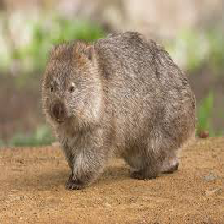

In [7]:
img

In [0]:
# convert to numpy format(height, width and colorchanel )
img_array = image.img_to_array(img)

In [9]:
#check
img_array.shape

(224, 224, 3)

In [0]:
# convert input image into 4D tensor i.e.(Batch size, height, width and color)
import numpy as np

img_tensor = np.expand_dims(img_array, axis=0)

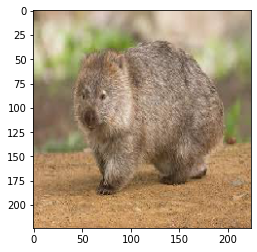

In [13]:
# check the pic
import matplotlib.pyplot as plt
plt.imshow(np.uint8(img_tensor[0]))

In [0]:
# Preprocess image in normalized size
x = preprocess_input(img_tensor)

In [0]:
preds = model.predict(x)

In [16]:
preds.shape

(1, 1000)

In [22]:
from tensorflow.keras.applications.resnet50 import decode_predictions as dpred 
dpred(preds, top=5)[0]

[('n01883070', 'wombat', 0.97611815),
 ('n02363005', 'beaver', 0.018244218),
 ('n02137549', 'mongoose', 0.002224191),
 ('n02442845', 'mink', 0.00078892364),
 ('n02361337', 'marmot', 0.0007168108)]

So, easily predict correct category.


Now Feature Extraction

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'wombat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [25]:
features

array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [ 0.       ,  0.       , 12.919807 , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ]],

        [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 29.917997 , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 46.316242 , ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [ 0.       ,  0.       , 18.587416 , ...,  0.       ,
           0.       ,  0.